# Breath of the Wild

In [1]:
pip install dataframe-image

Note: you may need to restart the kernel to use updated packages.


In [2]:
# call in dependencies
import requests
import json
import pandas as pd
import os
from pyrule_compendium import compendium
from pprint import pprint
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import numpy as np
import pandas as pd
import dataframe_image as dfi

In [3]:
comp = compendium()

#pprint(comp.get_all()["equipment"][0]) # get all entries
# print(comp.get_entry("silver lynel")) # get a specific entry with it's name
# pprint(comp.get_entry(380)) #get a specific entry with it's ID
# pprint(comp.get_category("equipment")) # get all entries in a category
# comp.download_entry_image("silver lynel", "dream_pet.png") # download entry image

# Weapons Observations

In [4]:
stuff = pd.read_csv("Stuff-Grid view.csv")
stuff_df = pd.DataFrame(stuff)
stuff_df


,name,class,subclass,tags,durability,strength,range,arrows,defense,defense_upgrade_lvl1,...,description,selling_price,bonus_set,upgrade_1,upgrade_2,upgrade_3,upgrade_4,armor_upgrade,where_to_find,notes
0,Ancient Short Sword,Weapon,Light,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,The blade of this sword was made using an anci...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Blizzard Rod,Weapon,Light,NaN,32.0,10.0,NaN,NaN,NaN,NaN,...,A magical rod that can cast extreme cold in a ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Boko Club,Weapon,Light,NaN,8.0,4.0,NaN,NaN,NaN,NaN,...,A crude Bokoblin club made to clobber small pr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bokoblin Arm,Weapon,Light,NaN,5.0,5.0,NaN,NaN,NaN,NaN,...,A skeletal arm that keeps moving even after it...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Boomerang,Weapon,Light,NaN,18.0,8.0,NaN,NaN,NaN,NaN,...,This throwing weapon was originally used by th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Trousers of the Wild,Armor,Leg,NaN,NaN,NaN,NaN,NaN,4.0,7.0,...,Legends says these pants were tailored for a h...,125.0,Master Sword Beam,"Acorn x10, Farosh's Scale x2","Courser Bee Honey x5, Farosh's Claw x2","Energetic Rhino Beetle x5, Farosh's Fang x2","Star Fragment x1, Farosh's Horn x2","Star Fragment,Acorn,Farosh's Scale,Courser Bee...",Find all 120 Shrines,NaN
280,Trousers of the Wind,Armor,Leg,NaN,NaN,NaN,NaN,NaN,3.0,5.0,...,Legends say these trousers were cherished by a...,125.0,Master Sword Beam,"Opal x3, Star Fragment x1","Opal x5, Star Fragment x3","Opal x15, Star Fragment x3","Opal x30, Star Fragment x4","Star Fragment,Opal",Amiibo - Toon/WW Link,NaN
281,Trousers of the Sky,Armor,Leg,NaN,NaN,NaN,NaN,NaN,3.0,5.0,...,Legends say these trousers were once worn by a...,125.0,Master Sword Beam,"Sapphire x1, Star Fragment x1","Sapphire x3, Star Fragment x2","Sapphire x5, Star Fragment x3","Sapphire x10, Star Fragment x4","Star Fragment,Sapphire",Amiibo -,NaN
282,Well-Worn Trousers,Armor,Leg,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,"These old trousers are threadbare in spots, bu...",15.0,NaN,NaN,NaN,NaN,NaN,NaN,Shrine - Resurrection,NaN


In [5]:
stuff_df = stuff_df.drop(columns=["tags", "range",
                    "arrows", "description", "selling_price","defense_upgrade_lvl1",
                     "where_to_find", "defense_upgrade_lvl2", "defense_upgrade_lvl3",
                     "upgrade_1","upgrade_2","upgrade_3", "upgrade_4","armor_upgrade",
                     "where_to_find","notes"])
stuff_df

,name,class,subclass,durability,strength,defense,defense_upgrade_lvl4,bonus,bonus_set
0,Ancient Short Sword,Weapon,Light,54.0,40.0,NaN,NaN,NaN,NaN
1,Blizzard Rod,Weapon,Light,32.0,10.0,NaN,NaN,NaN,NaN
2,Boko Club,Weapon,Light,8.0,4.0,NaN,NaN,NaN,NaN
3,Bokoblin Arm,Weapon,Light,5.0,5.0,NaN,NaN,NaN,NaN
4,Boomerang,Weapon,Light,18.0,8.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
279,Trousers of the Wild,Armor,Leg,NaN,NaN,4.0,28.0,NaN,Master Sword Beam
280,Trousers of the Wind,Armor,Leg,NaN,NaN,3.0,20.0,NaN,Master Sword Beam
281,Trousers of the Sky,Armor,Leg,NaN,NaN,3.0,20.0,NaN,Master Sword Beam
282,Well-Worn Trousers,Armor,Leg,NaN,NaN,1.0,NaN,NaN,NaN


In [6]:
#fillna(o) in durability and strength columns 
stuff_df[['durability', 'strength','defense' ]] = stuff_df[['durability', 'strength','defense']].fillna(0)
stuff_df[['bonus','bonus_set']] = stuff_df[['bonus','bonus_set']].fillna("None")

stuff_df

,name,class,subclass,durability,strength,defense,defense_upgrade_lvl4,bonus,bonus_set
0,Ancient Short Sword,Weapon,Light,54.0,40.0,0.0,NaN,None,None
1,Blizzard Rod,Weapon,Light,32.0,10.0,0.0,NaN,None,None
2,Boko Club,Weapon,Light,8.0,4.0,0.0,NaN,None,None
3,Bokoblin Arm,Weapon,Light,5.0,5.0,0.0,NaN,None,None
4,Boomerang,Weapon,Light,18.0,8.0,0.0,NaN,None,None
...,...,...,...,...,...,...,...,...,...
279,Trousers of the Wild,Armor,Leg,0.0,0.0,4.0,28.0,None,Master Sword Beam
280,Trousers of the Wind,Armor,Leg,0.0,0.0,3.0,20.0,None,Master Sword Beam
281,Trousers of the Sky,Armor,Leg,0.0,0.0,3.0,20.0,None,Master Sword Beam
282,Well-Worn Trousers,Armor,Leg,0.0,0.0,1.0,NaN,None,None


In [7]:
weapons = stuff_df[stuff_df["class"] == "Weapon"]
shields = stuff_df[stuff_df["class"] == "Shield"]
bows = stuff_df[stuff_df["class"] == "Bow"]

## Weapons Charts 

In [8]:
#weapon data frame
weapons_df = pd.DataFrame(weapons)
weapons_df = weapons[['name', 'class', 'durability', 'strength', 'defense']]
weapons_df

,name,class,durability,strength,defense
0,Ancient Short Sword,Weapon,54.0,40.0,0.0
1,Blizzard Rod,Weapon,32.0,10.0,0.0
2,Boko Club,Weapon,8.0,4.0,0.0
3,Bokoblin Arm,Weapon,5.0,5.0,0.0
4,Boomerang,Weapon,18.0,8.0,0.0
...,...,...,...,...,...
122,Throwing Spear,Weapon,20.0,6.0,0.0
123,Thunderspear,Weapon,50.0,22.0,0.0
124,Traveler's Spear,Weapon,30.0,3.0,0.0
125,Wooden Mop,Weapon,8.0,5.0,0.0


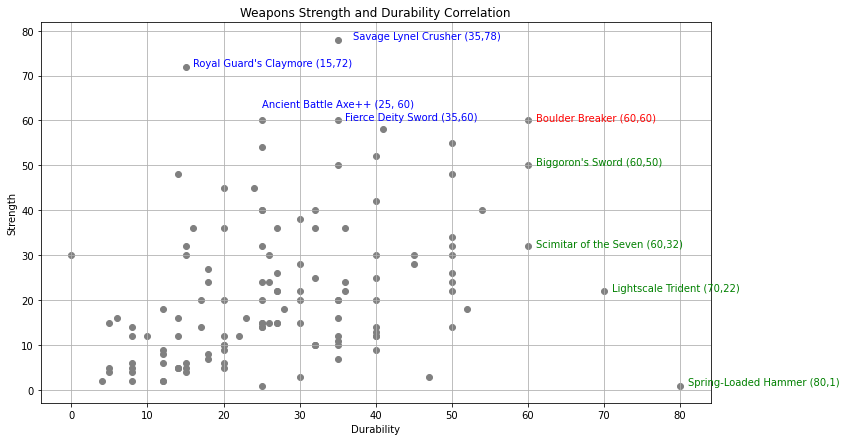

<Figure size 432x288 with 0 Axes>

In [9]:

#weapon correlation between strength and durability 
fig = plt.figure(figsize=(12,7))
plt.scatter(weapons_df['durability'],weapons_df['strength'], color= "grey")
plt.title('Weapons Strength and Durability Correlation')
plt.xlabel('Durability')
plt.ylabel('Strength')
plt.grid()

#annotating durable weapons
plt.text(81,1,'Spring-Loaded Hammer (80,1)', horizontalalignment='left', color = 'green')
plt.text(71,22, 'Lightscale Trident (70,22)', horizontalalignment='left', color = 'green')
plt.text(61,32,'Scimitar of the Seven (60,32)', horizontalalignment='left', color = 'green')
plt.text(61,50,"Biggoron's Sword (60,50)", horizontalalignment='left', color = 'green')
plt.text(61,60,'Boulder Breaker (60,60)', horizontalalignment='left', color = 'red')
#annotating strong weapons
plt.text(37,78,'Savage Lynel Crusher (35,78)', horizontalalignment='left', color = 'blue')
plt.text(16,72,"Royal Guard's Claymore (15,72)", horizontalalignment= 'left', color = 'blue' )
plt.text(36,60,"Fierce Deity Sword (35,60)", horizontalalignment= 'left', color = 'blue' )
plt.text(25,63,"Ancient Battle Axe++ (25, 60)", horizontalalignment= 'left', color = 'blue' )
plt.show()
plt.savefig("../BotW/images/weapons_scatter.png")


In [10]:
#weapon durability data 
weapons_dur_data = weapons_df[["name",  "durability"]]
weapons_dur_data= weapons_dur_data.sort_values(by="durability", ascending=False)
weapons_dur_data = weapons_dur_data.head(10)
weapons_dur_data= weapons_dur_data.set_index('name')
weapons_dur_data

,durability
name,
Spring-Loaded Hammer,80.0
Lightscale Trident,70.0
Scimitar of the Seven,60.0
Biggoron's Sword,60.0
Boulder Breaker,60.0
Ancient Short Sword,54.0
Double Axe,52.0
Royal Halberd,50.0
Great Thunderblade,50.0


In [11]:
#weapon strength data 
weapons_str_data = weapons_df[["name", "strength"]]
weapons_str_data= weapons_str_data.sort_values(by="strength", ascending=False)
weapons_str_data= weapons_str_data.head(10)
weapons_str_data.set_index('name')
weapons_str_data= weapons_str_data.set_index('name')
weapons_str_data

,strength
name,
Savage Lynel Crusher,78.0
Royal Guard's Claymore,72.0
Fierce Deity Sword,60.0
Boulder Breaker,60.0
Ancient Battle Axe++,60.0
Savage Lynel Sword,58.0
Ancient Bladesaw,55.0
Mighty Lynel Crusher,54.0
Royal Claymore,52.0


## Shields Charts


In [12]:
#new shields data frame
shields_df = pd.DataFrame(shields)
shields_df = shields_df[['name', 'class', 'durability', 'strength', 'defense']]
shields_df

,name,class,durability,strength,defense
127,Ancient Shield,Shield,32.0,70.0,0.0
128,Boko Shield,Shield,5.0,3.0,0.0
129,Daybreaker,Shield,60.0,48.0,0.0
130,Dragonbone Boko Shield,Shield,8.0,25.0,0.0
131,Emblazoned Shield,Shield,12.0,3.0,0.0
132,Fisherman's Shield,Shield,10.0,3.0,0.0
133,Forest Dweller's Shield,Shield,18.0,30.0,0.0
134,Gerudo Shield,Shield,20.0,20.0,0.0
135,Guardian Shield,Shield,10.0,18.0,0.0
136,Guardian Shield+,Shield,13.0,30.0,0.0


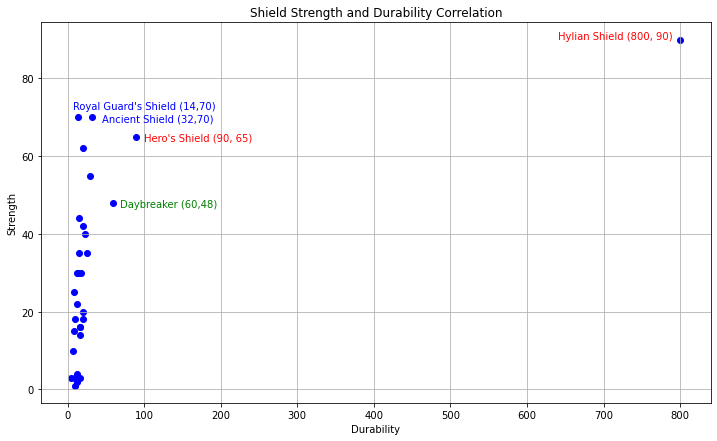

<Figure size 432x288 with 0 Axes>

In [13]:

#shields correlation between strength and durability 
fig = plt.figure(figsize=(12,7))
plt.scatter( shields_df['durability'], shields_df['strength'] , color="blue")
plt.title('Shield Strength and Durability Correlation')
plt.xlabel('Durability')
plt.ylabel('Strength')
plt.grid()

#annotating durable shields
plt.text(790,90, 'Hylian Shield (800, 90)', horizontalalignment='right', color='red')
plt.text(100,64, "Hero's Shield (90, 65)", horizontalalignment='left', color='red')
plt.text(69,47,'Daybreaker (60,48)', horizontalalignment='left', color='green')

#annotating strong shields
plt.text(45,69,'Ancient Shield (32,70)', horizontalalignment='left',color="blue" )
plt.text(7,72,"Royal Guard's Shield (14,70)", horizontalalignment='left',color="blue")
plt.show()
plt.savefig("../BotW/images/shield_scatter.png")


In [14]:
#shield durability data 
shields_dur_df = shields_df[["name",  "durability"]]
shields_dur_df = shields_dur_df .sort_values(by="durability", ascending=False)
shields_dur_df = shields_dur_df .head(10)
shields_dur_df = shields_dur_df .set_index('name')
shields_dur_df 

,durability
name,
Hylian Shield,800.0
Hero's Shield,90.0
Daybreaker,60.0
Ancient Shield,32.0
Royal Shield,29.0
Radiant Shield,26.0
Knight's Shield,23.0
Gerudo Shield,20.0
Silver Shield,20.0


In [15]:
#shield strength data 
shields_str_df= shields_df[["name", "strength"]]
shields_str_df= shields_str_df.sort_values(by="strength", ascending=False)
shields_str_df.set_index('name')
shields_str_df= shields_str_df.head(10)
shields_str_df= shields_str_df.set_index('name')
shields_str_df

,strength
name,
Hylian Shield,90.0
Ancient Shield,70.0
Royal Guard's Shield,70.0
Hero's Shield,65.0
Savage Lynel Shield,62.0
Royal Shield,55.0
Daybreaker,48.0
Mighty Lynel Shield,44.0
Guardian Shield++,42.0


# Bow Charts

In [16]:
#bow data frame
bows_df = pd.DataFrame(bows)
bows_df = bows_df[['name', 'class', 'durability', 'strength', 'defense']]
bows_df

,name,class,durability,strength,defense
160,Ancient Bow,Bow,120.0,44.0,0.0
161,Boko Bow,Bow,16.0,4.0,0.0
162,Bow of Light,Bow,100.0,100.0,0.0
163,Dragon Bone Boko Bow,Bow,30.0,24.0,0.0
164,Duplex Bow,Bow,18.0,14.0,0.0
165,Falcon Bow,Bow,50.0,20.0,0.0
166,Forest Dweller's Bow,Bow,35.0,15.0,0.0
167,Golden Bow,Bow,60.0,14.0,0.0
168,Great Eagle Bow,Bow,60.0,28.0,0.0
169,Knight's Bow,Bow,48.0,26.0,0.0


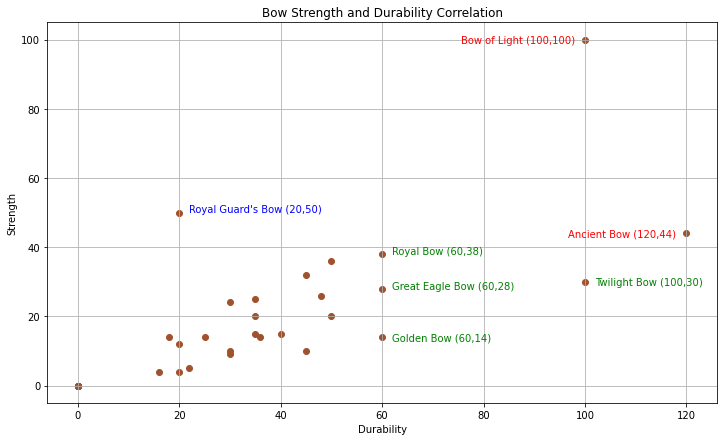

<Figure size 432x288 with 0 Axes>

In [17]:

#bows correlation between strength and durability 
fig = plt.figure(figsize=(12,7))
plt.scatter(bows_df['durability'],bows_df['strength'], color="sienna")
plt.title('Bow Strength and Durability Correlation')
plt.xlabel('Durability')
plt.ylabel('Strength')
plt.grid()

#annotating durable bows
plt.text(118,43, 'Ancient Bow (120,44)', horizontalalignment='right', color='red')
plt.text(98,99, 'Bow of Light (100,100)', horizontalalignment='right', color='red')
plt.text(102,29, 'Twilight Bow (100,30)', horizontalalignment='left', color='green')
plt.text(62,13, 'Golden Bow (60,14)', horizontalalignment='left', color='green')
plt.text(62,38, 'Royal Bow (60,38)', horizontalalignment='left', color='green')
plt.text(62,28, 'Great Eagle Bow (60,28)', horizontalalignment='left', color='green')

#annotating strong bows
plt.text(22,50, "Royal Guard's Bow (20,50)", horizontalalignment='left', color='blue')


plt.show()
plt.savefig("../BotW/images/bows_scatter.png")

In [18]:
#bows durability data 
bows_dur_df = bows_df[["name",  "durability"]]
bows_dur_df = bows_dur_df .sort_values(by="durability", ascending=False)
bows_dur_df = bows_dur_df .head(10)
bows_dur_df = bows_dur_df .set_index('name')
bows_dur_df 

,durability
name,
Ancient Bow,120.0
Bow of Light,100.0
Twilight Bow,100.0
Golden Bow,60.0
Royal Bow,60.0
Great Eagle Bow,60.0
Steel Lizal Bow,50.0
Falcon Bow,50.0
Knight's Bow,48.0


In [19]:
#shield strength data 
bows_str_df= bows_df[["name","strength"]]
bows_str_df= bows_str_df.sort_values(by="strength", ascending=False)
bows_str_df= bows_str_df.head(10)
bows_str_df= bows_str_df.set_index('name')
bows_str_df

,strength
name,
Bow of Light,100.0
Royal Guard's Bow,50.0
Ancient Bow,44.0
Royal Bow,38.0
Steel Lizal Bow,36.0
Savage Lynel Bow,32.0
Twilight Bow,30.0
Great Eagle Bow,28.0
Knight's Bow,26.0
